# **Self-Driving Car Project**
## **Introduction**
Hey there! Welcome to this exciting journey where we're diving into the world of self-driving cars. Imagine a car that can drive itself – pretty cool, right? That's exactly what we're working on in this notebook.

So, here's the deal: we're on a mission to create a simple self-driving car project. Our big goal is to teach our computer how to steer a car just like a human would. To make this happen, we've got our hands on some data from the Udacity Self-driving Car Simulator. This data gives us sets of three pictures taken at the same time – that's going to be our secret sauce for training our system.

Now, let's talk about the brain behind our self-driving car magic – the NVIDIA model. It's like a super smart version of the brain in your head, specifically designed for understanding pictures. With this model, we're going to figure out the best steering angles for our car. It's kind of like teaching a robot how to steer using its "eyes."

Throughout this adventure, we're not just going to make things work, but we'll also understand how they work. We'll unravel the mysteries of AI and neural networks, and by the end, we'll have a taste of how self-driving cars are shaping the future of how we get around. So, buckle up and let's roll!

##**Codes**
I broke this notebook into 4 main parts to know what we are doing which are 'Analyzing Data', 'Preparing Data', 'Creating Model' and 'Training'. Now, we will be starting with 'Analyzing Data'.

## Analysing data

Before we dive deeper into our self-driving car project, let's make sure we have the necessary tools at our disposal.

In [ ]:
!git clone https://github.com/MulahTeni/track
!ls track
!pip3 install imgaug
!pip install matplotlib
!pip install opencv-python
!pip install keras
!pip install tensorflow
!pip install scikit-learn

fatal: destination path 'track' already exists and is not an empty directory.
driving_log.csv  IMG


Now that we've armed ourselves with the essential packages, let's import them to set the groundwork for our self-driving car journey.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

To use data, we need to know what they are, right? let's find out

In [ ]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

<ipython-input-43-8dde8c7f6a42>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg   

                                                                   left  \
0  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg   

                                                                   right  \
0  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg   
1  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg   
2  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg   
3  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg   
4  C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.649786  
1  0.0       0.0       0.0      0.627942  
2  0.0       0.0       0.0      0.622910  
3  0.0       0.0       0.0      0.619162  
4  0.0       0.0       0.0      0.615438

There is unnecessary information in the path, let's get rid of them.

In [ ]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

In [ ]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2018_07_16_17_11_43_382.jpg  0.0       0.0       0.0      0.649786  
1  right_2018_07_16_17_11_43_670.jpg  0.0       0.0       0.0      0.627942  
2  right_2018_07_16_17_11_43_724.jpg  0.0       0.0       0.0      0.622910  
3  right_2018_07_16_17_11_43_792.jpg  0.0       0.0       0.0      0.619162  
4  right_2018_07_16_17_11_43_860.jpg  0.0       0.0       0.0      0.615438

Visualizing is always important for better understanding.

total data: 4053


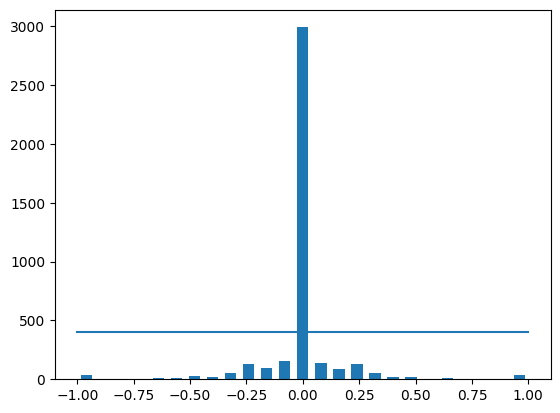

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
print('total data:', len(data))

As we can see the amount of data at point 0.00 is huge, we need to reduce the amount of data to avoid overfitting.

## Preparing Data for model
### Augmenting Images

Let's get rid of redundant data. No need to keep more cats than can catch mice.

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


As we can see, removed data is more than the remaining data. But now cats are happy, mice are happy.

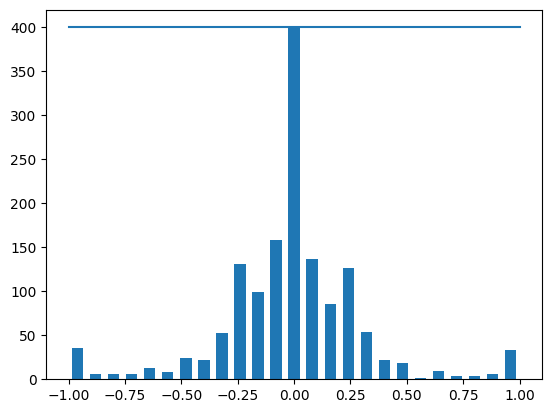

In [ ]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

 We need to set all images to use, the function below will do that.


In [ ]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

Now we split the data into training and validation.

Training Samples: 3511
Valid Samples: 878


Text(0.5, 1.0, 'Validation set')

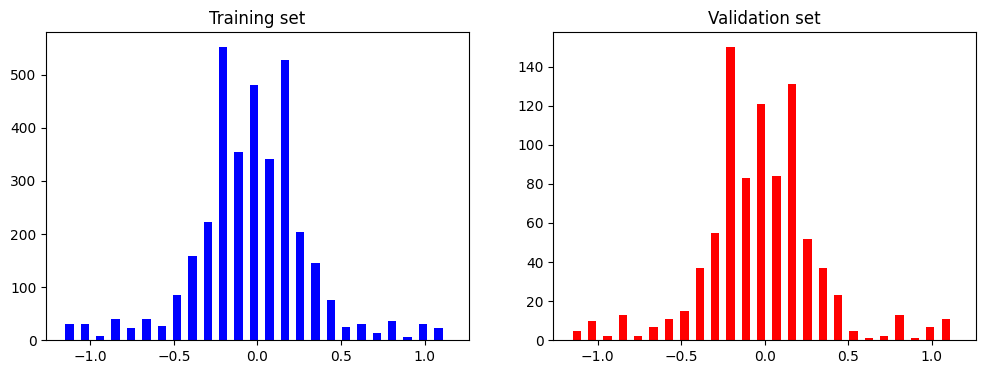

In [ ]:
image_paths, steerings = load_img_steering(datadir + '/IMG', data)
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

The functions below are defined to preproccess the data. These functions:
* Zooms in the image,
* Pans the image,
* Randomizes brightness of image,
* Flips the image to create variations.

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle



Let's define a function to preproccess all data.

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

Let's select a random image test our functions.

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)

Zoom function testing...

Text(0.5, 1.0, 'Zoomed Image')

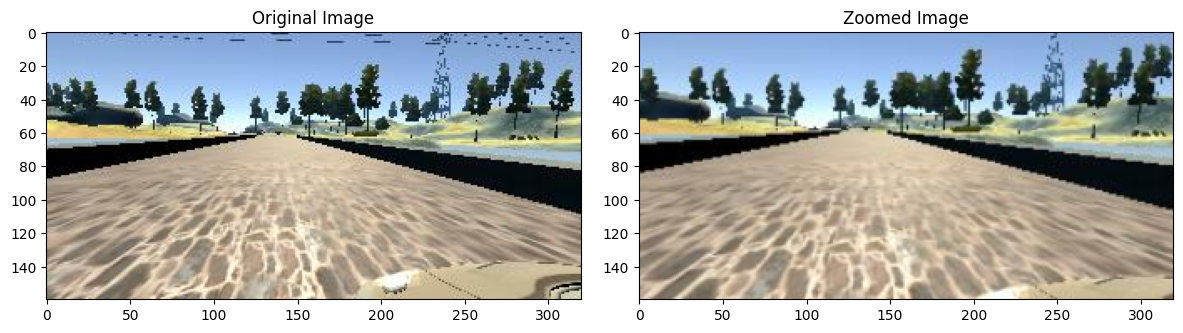

In [ ]:
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

It works!

Panning function testing...

Text(0.5, 1.0, 'Panned Image')

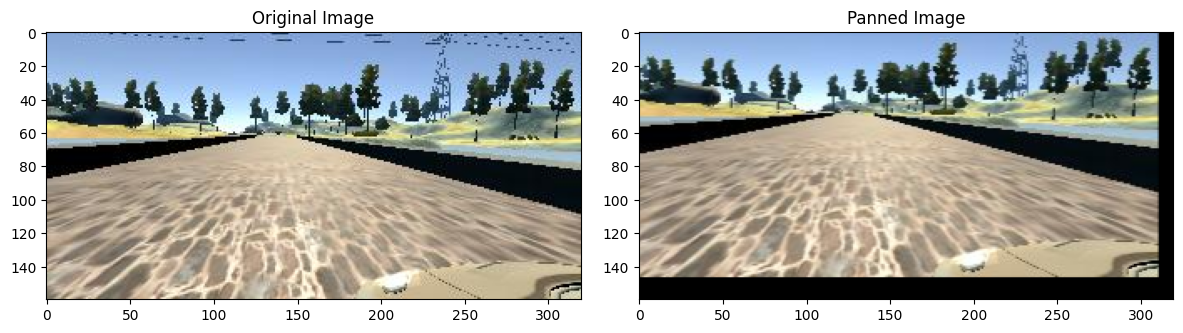

In [ ]:
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

It works!

Brightness randomizing function testing...

Text(0.5, 1.0, 'Brightness altered image ')

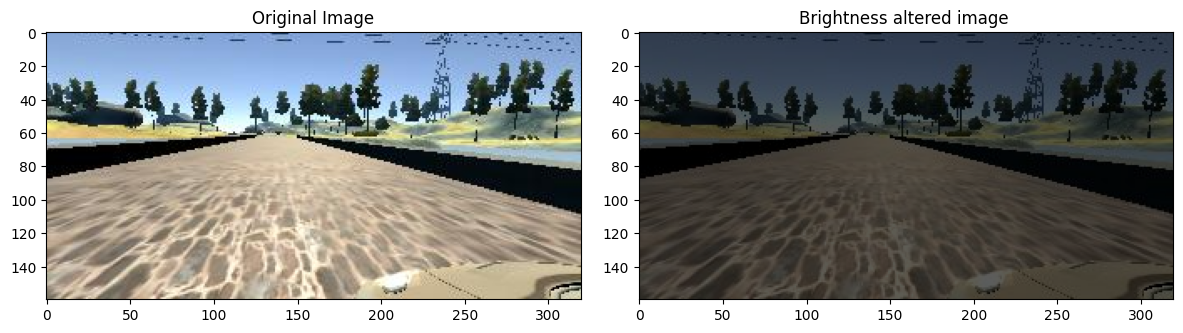

In [ ]:
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

It works!

Flipping function testing...

Text(0.5, 1.0, 'Flipped Image')

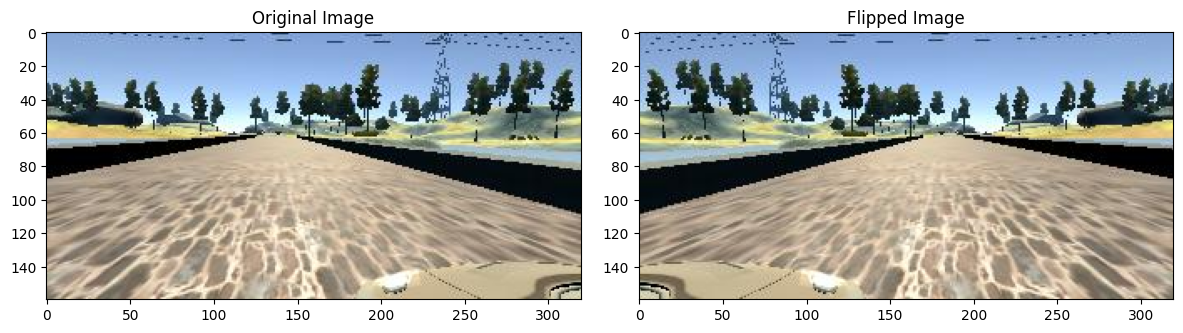

In [ ]:
random_index = random.randint(0, 1000)
steering_angle = steerings[random_index]

flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image')

It works!

We tested the functions separately, now let's test them together.

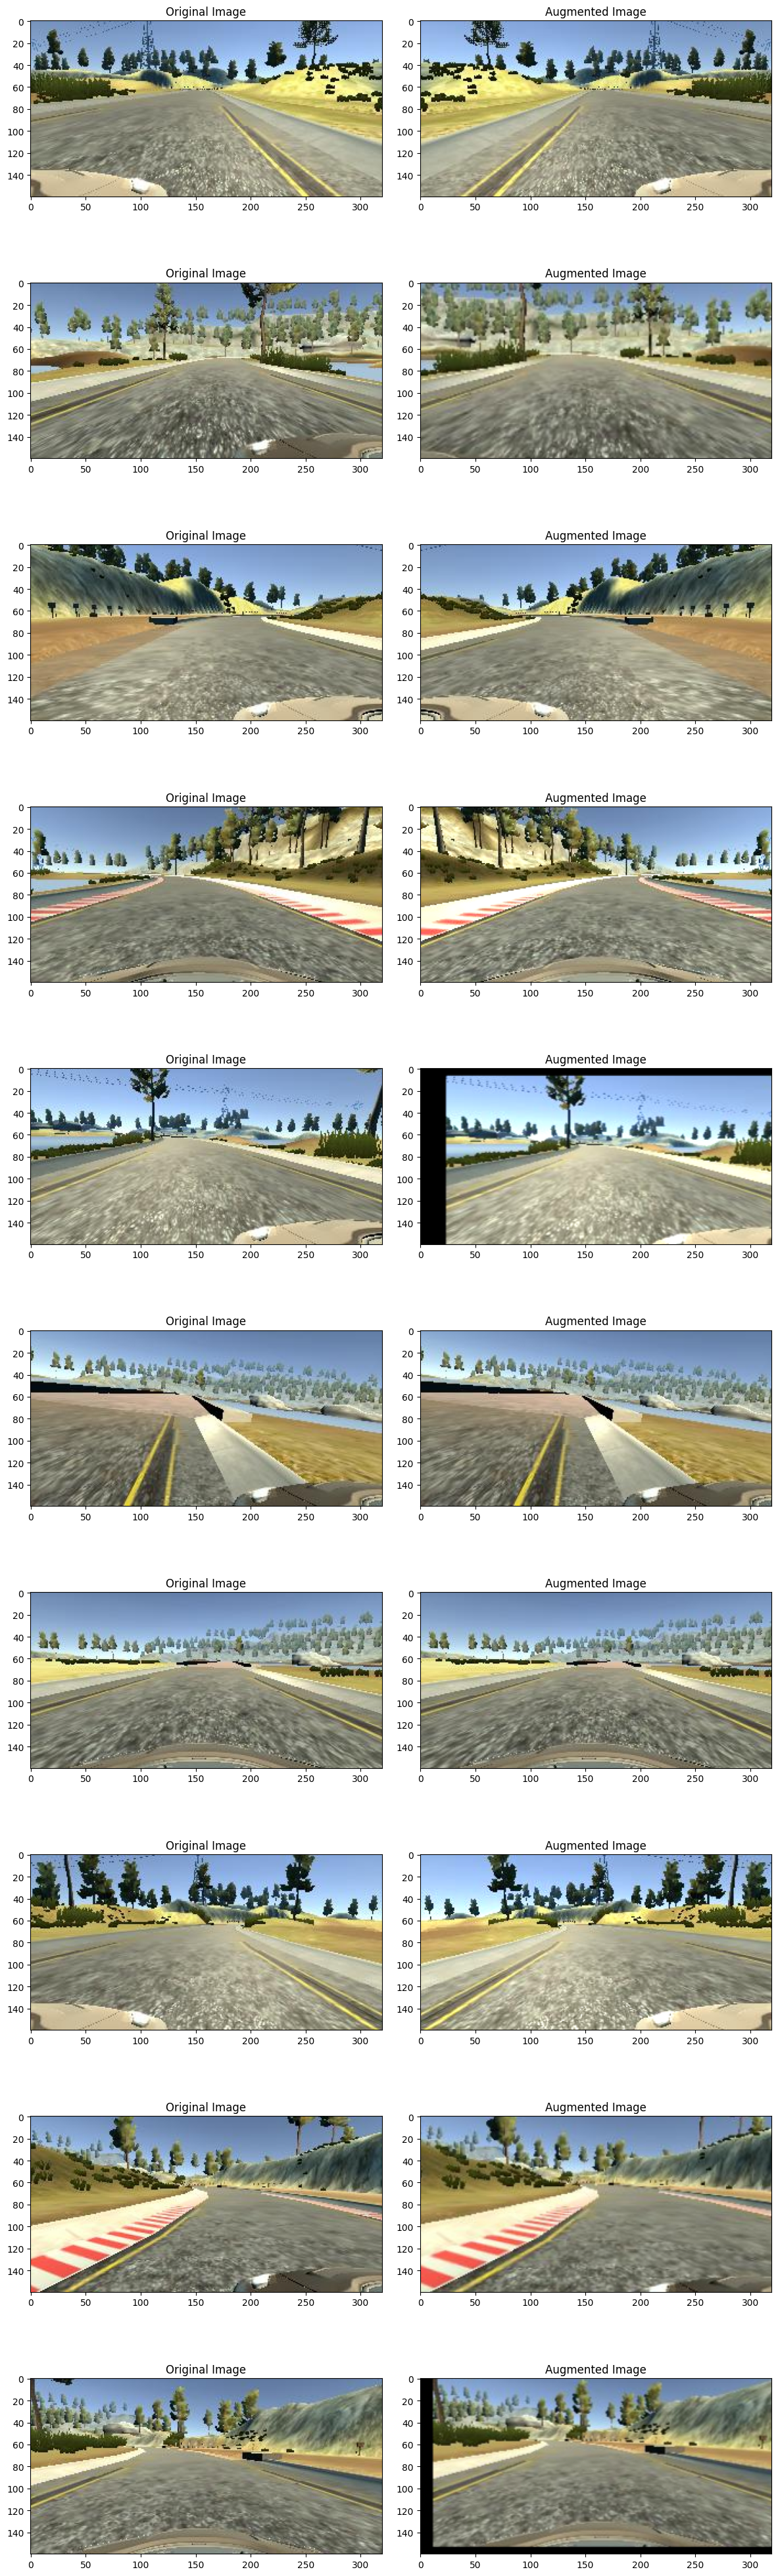

In [ ]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 40))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Seems like working fine.

### Preproccessing Image

Let's define a function for preproccessing images.

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Preproccessing testing...

Text(0.5, 1.0, 'Preprocessed Image')

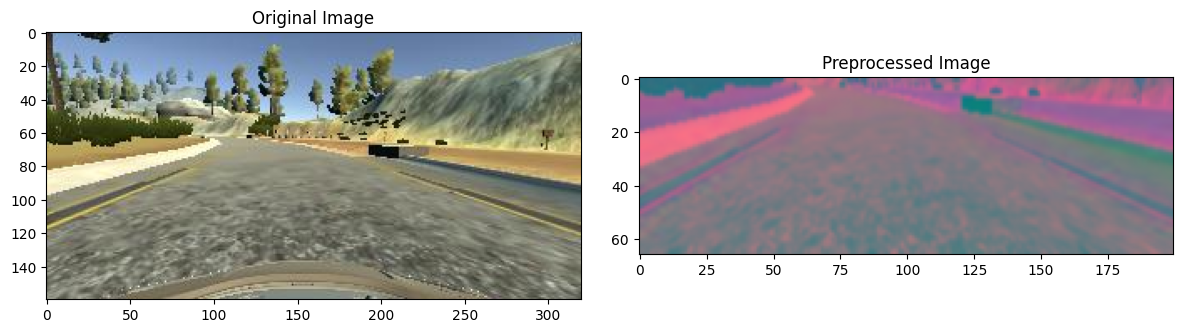

In [ ]:
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

It works!

Let's define a function to combine augmenting and preproccessing.

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

Batch Generator testing...

Text(0.5, 1.0, 'Validation Image')

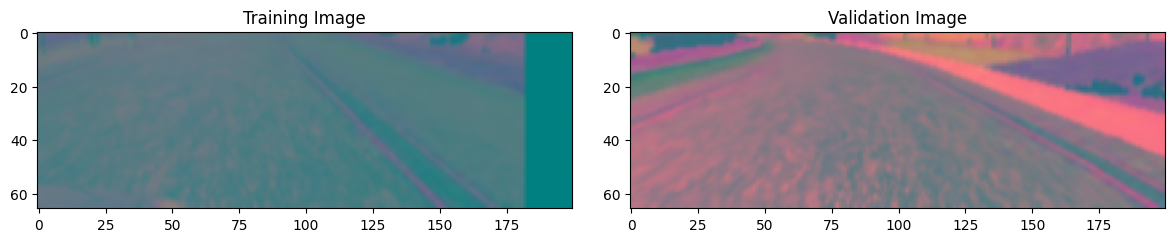

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(12, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

It works!

## **Creating Model**

Let's define the model as NVIDA model.

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='elu'))
  model.add(Convolution2D(36, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(48, kernel_size=(5,5), strides=(2,2), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
  model.add(Convolution2D(64, kernel_size=(3,3), activation='elu'))
#   model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model

Test the model created smoothly...

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_10 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_12 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Yes, It did.

## Training Model

Let's train the model.

<ipython-input-65-1c651f576f4e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),


Epoch 1/10
300/300 [==============================] - 469s 2s/step - loss: 0.1533 - val_loss: 0.0751
Epoch 2/10
300/300 [==============================] - 458s 2s/step - loss: 0.0730 - val_loss: 0.0603
Epoch 3/10
300/300 [==============================] - 439s 1s/step - loss: 0.0626 - val_loss: 0.0476
Epoch 4/10
300/300 [==============================] - 427s 1s/step - loss: 0.0555 - val_loss: 0.0358
Epoch 5/10
300/300 [==============================] - 415s 1s/step - loss: 0.0497 - val_loss: 0.0355
Epoch 6/10
300/300 [==============================] - 385s 1s/step - loss: 0.0487 - val_loss: 0.0290
Epoch 7/10
300/300 [==============================] - 386s 1s/step - loss: 0.0440 - val_loss: 0.0299
Epoch 8/10
300/300 [==============================] - 357s 1s/step - loss: 0.0433 - val_loss: 0.0327
Epoch 9/10
300/300 [==============================] - 370s 1s/step - loss: 0.0421 - val_loss: 0.0299
Epoch 10/10
300/300 [==============================] - 348s 1s/step - loss: 0.0389 - val_lo

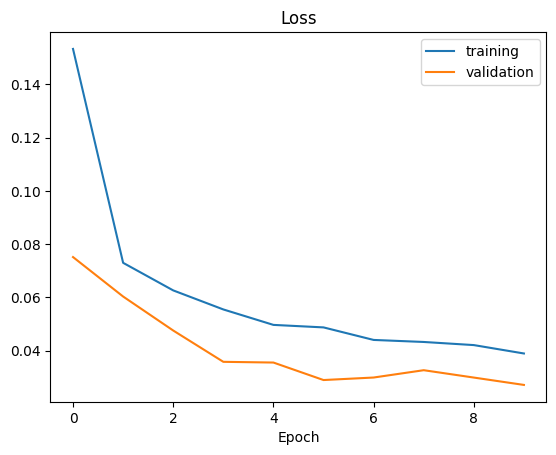

In [ ]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')
model.save('model.h5')

Save the model for later use.

In [67]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion
In this project, our primary objective was to develop a functional self-driving car. To achieve this, we employed a Simulator to gather essential driving data and to evaluate the performance of our autonomous driving model.

The initial step involved data collection, during which the simulator provided us with images of various driving scenarios. These images were subjected to preprocessing procedures to enhance the quality and relevance of the data before being utilized for training our NVIDIA Model.

The core of our project revolved around training the NVIDIA Model. This involved employing a deep learning approach to enable the model to understand and replicate human-like driving behaviors. The trained model was then subjected to rigorous testing procedures.

Ultimately, the trained model underwent comprehensive testing to gauge its effectiveness in driving autonomously. By feeding it new scenarios and evaluating its responses, we were able to ascertain the model's capacity to navigate and make driving decisions.

In conclusion, our project marks a significant step towards the realization of self-driving cars. Through the integration of simulation-based data collection, advanced preprocessing techniques, and deep learning model training, we successfully developed a model capable of autonomous driving.